# Lead Scoring Case Study

## ## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Goals and Objectives
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 1. Import Important libraries

In [152]:
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

# Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

## 2. Read Data & Inspect data

In [153]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [154]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 3. Cleaning Data

### Replacing 'Select' with NaN (Since it means no option is selected)

In [155]:
# Converting all the values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [156]:
leads = leads.replace('select',np.nan)

### Droping columns with one unique value as it won't affect our analysis

In [157]:
# Checking if there are columns with one unique value
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### columns with one unique value
1. Magazine    
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque

In [158]:
leads= leads.drop(['Magazine',
                   'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content', 
                   'Get updates on DM Content',
                   'I agree to pay the amount through cheque'],axis=1)

In [159]:
# Checking if still there are columns with one unique value
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          


### Dropping columns having high number of null values


In [160]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [161]:
# list all the columns that are no required and have 35% null values
columns_high_null = leads.columns[round(100*(leads.isnull().sum()/len(leads.index)), 2).values > 35]
columns_high_null

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [162]:
# drop all the columns that are no required and have 35% null values
leads = leads.drop(['How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [163]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [164]:
# list all the columns that have null values
leads.columns[round(100*(leads.isnull().sum()/len(leads.index)), 2).values > 0]

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

#### There huge number of rows with null values in below columns. But these are important columns. Hence it is not good to drop these columns. But we can replace null values with 'not provided'.
1. Country                                          
2. Specialization                                   
3.  What is your current occupation                  
4.  What matters most to you in choosing a course    

In [165]:
leads['Country'] = leads['Country'].fillna('not provided')
leads['Specialization'] = leads['Specialization'].fillna('not provided') 
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')


leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [166]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

### Categorization of column 'Country'

In [167]:
leads["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
nigeria                    4
south africa               4
kuwait                     4
canada                     4
germany                    4
sweden                     3
ghana                      2
belgium                    2
uganda                     2
italy                      2
asia/pacific region        2
china                      2
bangladesh                 2
netherlands                2
philippines                2
vietnam                    1
switzerland                1
sri lanka                  1
kenya                      1
indonesia                  1
russia        

In [168]:
def function_country(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:function_country(x['Country']), axis = 1)
leads['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [169]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

### Drop rows having null values in any column.

In [170]:
# As number of rows having null values are very less, it is ok to drop such rows
leads = leads[leads.isnull().sum(axis=1) <1]

In [171]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [172]:
# Checking if there are columns with one unique value
leads.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [173]:
leads.shape

(9074, 23)

In [174]:
# As 'Prospect ID' is unique for every one, it is ok to drop this column
leads = leads.drop('Prospect ID',1)
leads.shape

(9074, 22)

## 4. EDA(Exploratory data analysis)

### 4.1 Univariate Analysis

#### 4.1.1 Categorical VAriables

In [175]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

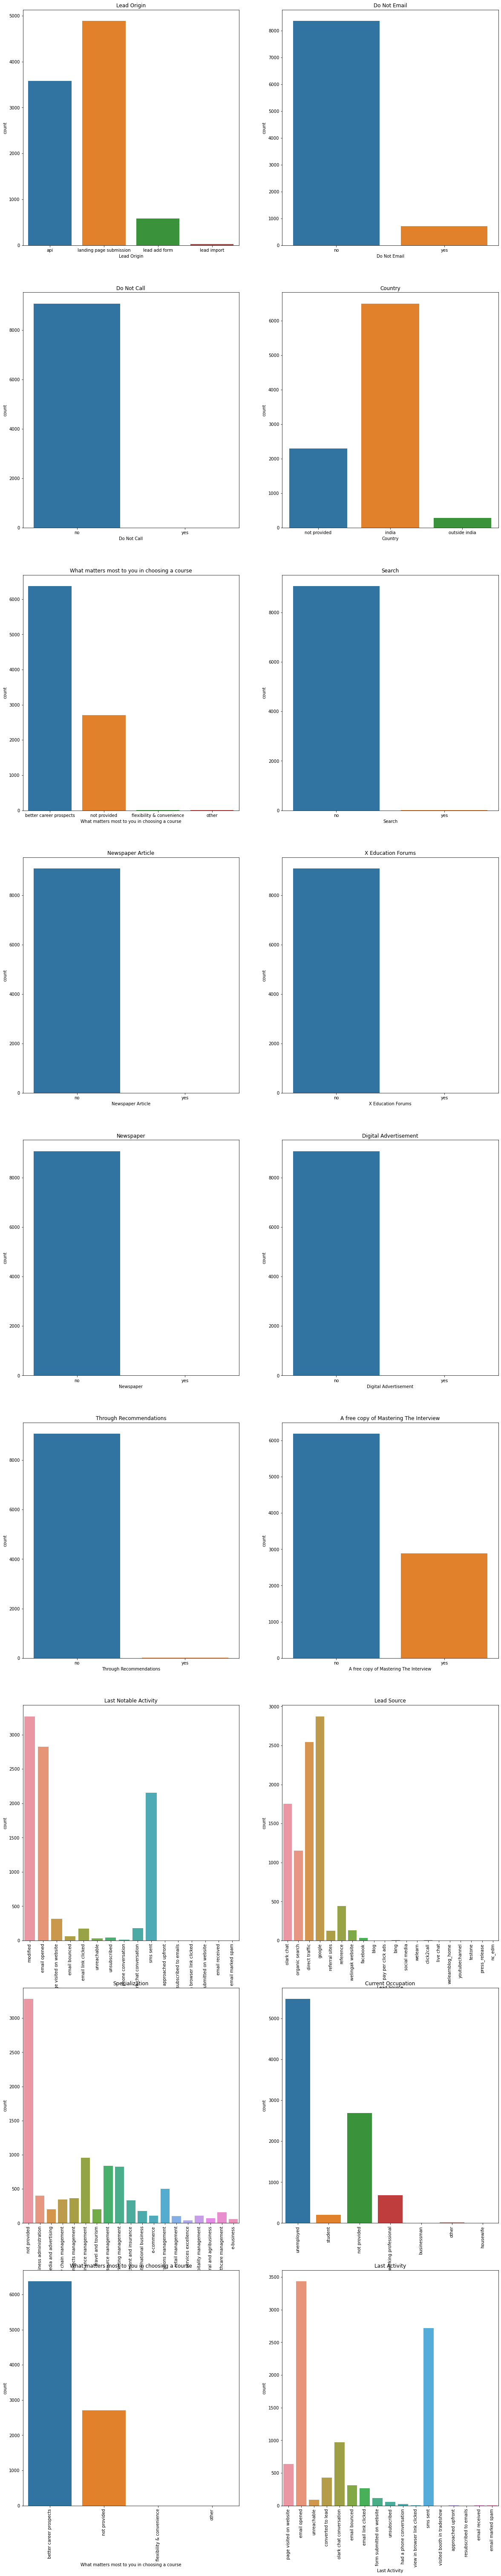

In [176]:
plt.figure(figsize = (20,120))

plt.subplot(10,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')
#
plt.subplot(10,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')
#
plt.subplot(10,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')
#
plt.subplot(10,2,4)
sns.countplot(leads['Country'])
plt.title('Country')
#
plt.subplot(10,2,5)
sns.countplot(leads['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
#
plt.subplot(10,2,6)
sns.countplot(leads['Search'])
plt.title('Search')
#
plt.subplot(10,2,7)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')
#
plt.subplot(10,2,8)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')
#
plt.subplot(10,2,9)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')
#
plt.subplot(10,2,10)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')
#
plt.subplot(10,2,11)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')
#
plt.subplot(10,2,12)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
#
plt.subplot(10,2,13)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
#
plt.subplot(10,2,14)
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
#

plt.subplot(10,2,15)
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
#
plt.subplot(10,2,16)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
#
plt.subplot(10,2,17)
sns.countplot(leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
#
plt.subplot(10,2,18)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

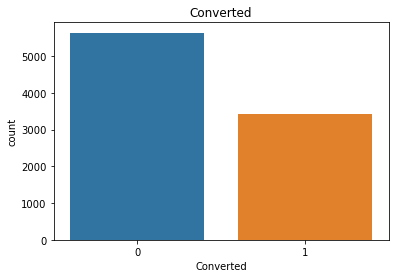

In [177]:
sns.countplot(leads['Converted'])
plt.title('Converted')
plt.show()

#### 4.1.2 Numerical Variables

In [178]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

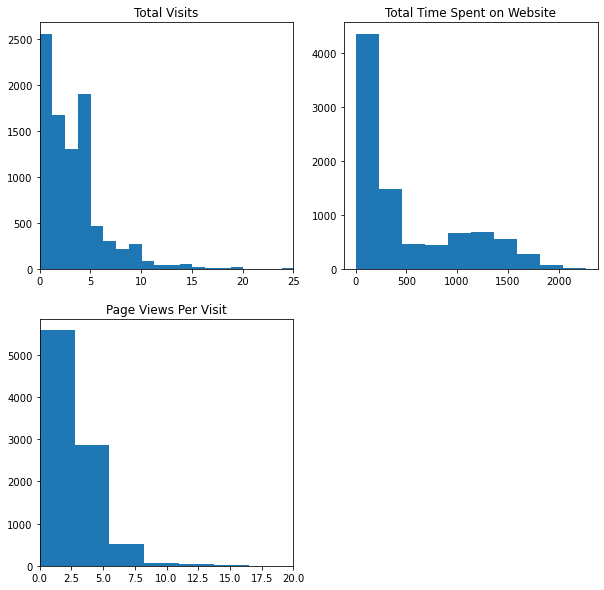

In [179]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


### 4.2 Relation between categorical variables to Converted

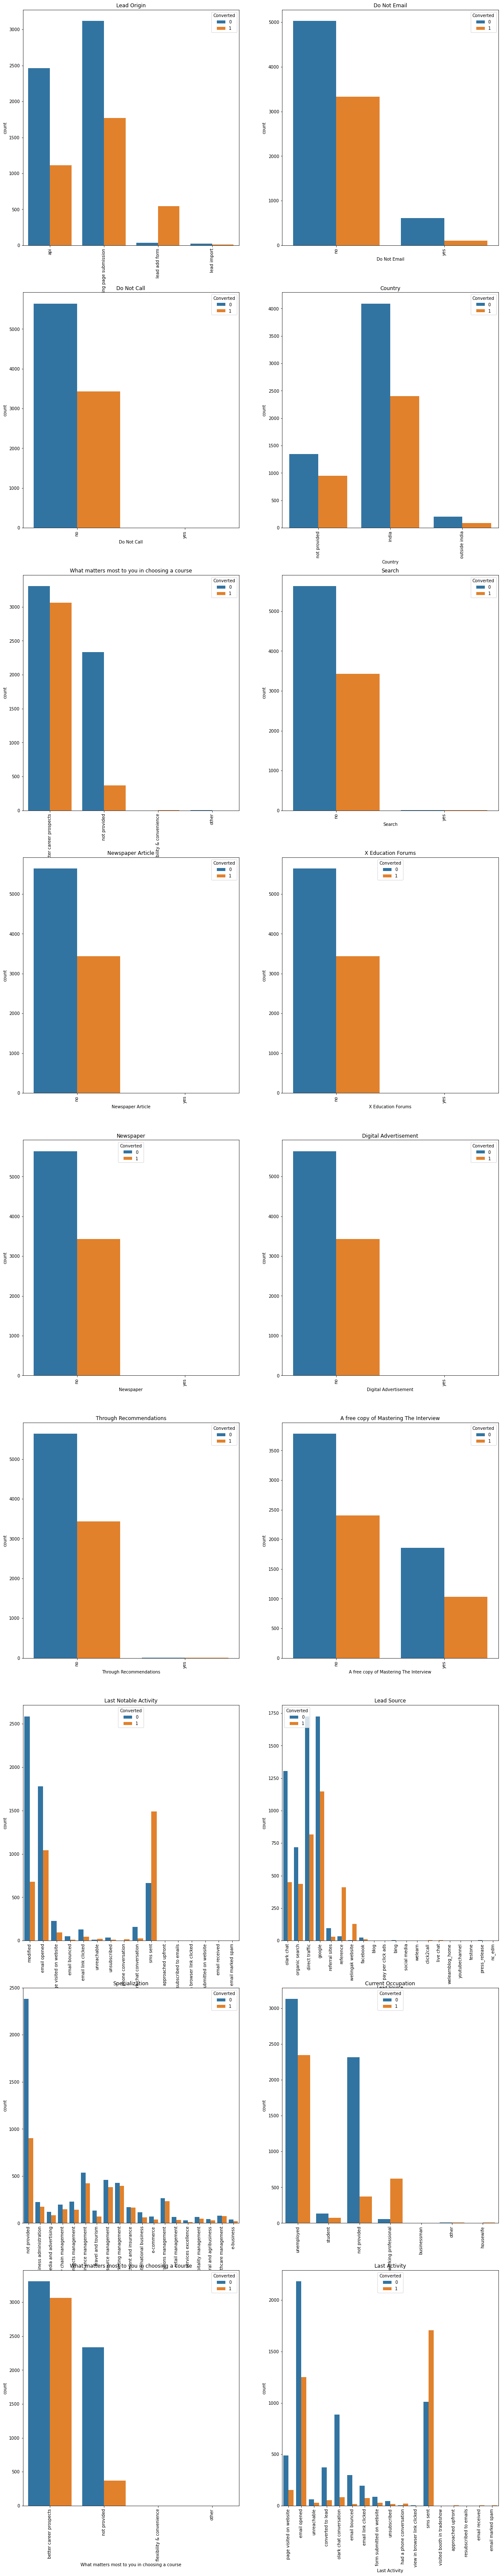

In [180]:
plt.figure(figsize = (20,120))

plt.subplot(10,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

#
plt.subplot(10,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')
#
plt.subplot(10,2,3)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
#
plt.subplot(10,2,4)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
#
plt.subplot(10,2,5)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
#
plt.subplot(10,2,6)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
#
plt.subplot(10,2,7)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
#
plt.subplot(10,2,8)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
#
plt.subplot(10,2,9)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')
#
plt.subplot(10,2,10)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
#
plt.subplot(10,2,11)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
#
plt.subplot(10,2,12)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
#
plt.subplot(10,2,13)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
#
plt.subplot(10,2,14)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
#

plt.subplot(10,2,15)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
#
plt.subplot(10,2,16)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
#
plt.subplot(10,2,17)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
#
plt.subplot(10,2,18)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

### 4.3 Correlation among varibles

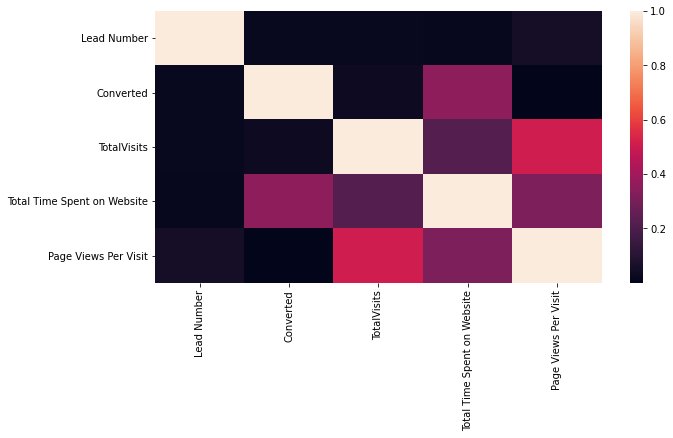

In [181]:
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

### 4.4 Outliers handling

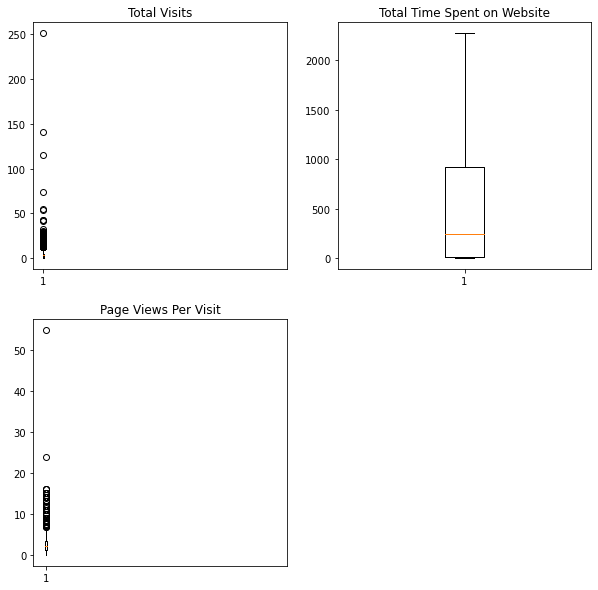

In [182]:

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.boxplot(leads.TotalVisits)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.boxplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.boxplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## 5. Dummy Variables

In [183]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [184]:
object_columns = leads.loc[:, leads.dtypes == 'object'].columns
object_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [185]:
# Create dummy variable for relevant columns
dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final = pd.concat([leads, dummy], axis=1)
leads_final

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not provided,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.50,email opened,india,not provided,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [186]:
leads_final = leads_final.drop(['Lead Number','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,23

## 5. Test-Train Split

In [187]:
X = leads_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [188]:
# Target variable in y
y = leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [189]:
# Split the dataset into 75% and 25% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10)

In [190]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
7232,0.007968,0.034771,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5351,0.019920,0.338028,0.208333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7249,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3302,0.015936,0.026408,0.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7331,0.011952,0.157570,0.125000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


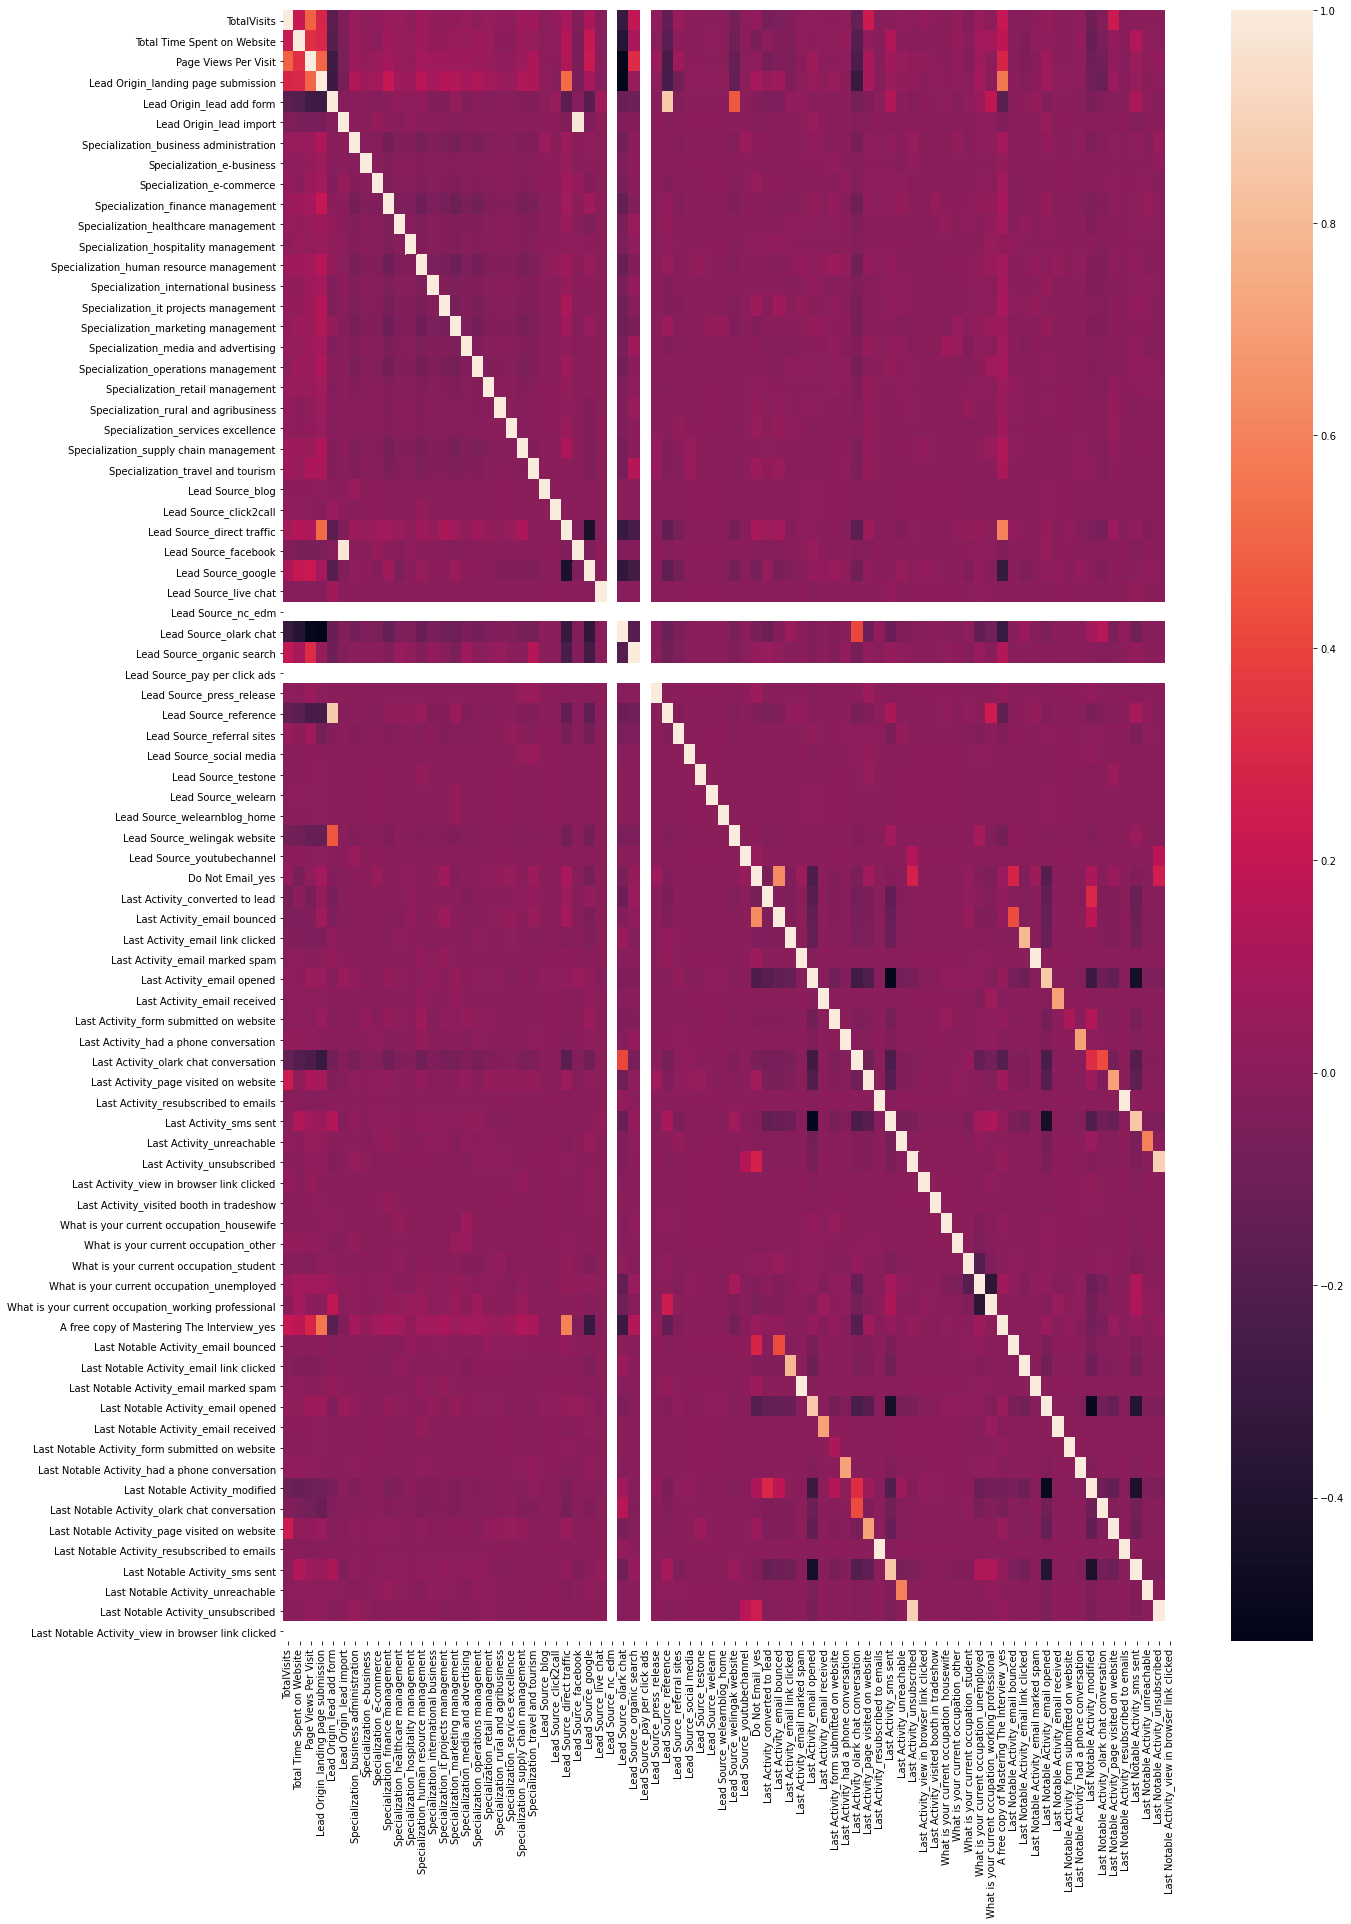

In [191]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## 6. Model Building

### 6.1 RFE

In [192]:
logreg = LogisticRegression()

In [193]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [194]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 39),
 ('Specialization_business administration', False, 29),
 ('Specialization_e-business', False, 26),
 ('Specialization_e-commerce', False, 24),
 ('Specialization_finance management', False, 31),
 ('Specialization_healthcare management', False, 22),
 ('Specialization_hospitality management', False, 50),
 ('Specialization_human resource management', False, 32),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 23),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 30),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 33),
 ('Specialization_serv

In [195]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [196]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [197]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [198]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.6
Date:                Sun, 10 Jul 2022   Deviance:                       5895.2
Time:                        14:17:56   Pearson chi2:                 6.85e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2813      0.075     -3.747      0.000      -0.428      -0.134
TotalVisits                                              2.2727      1.526      1.489      0.136      -0.718       5.264
Total Time Spent on Website                              3.9097      0.141     27.709      0.000       3.633       4.186
Lead Origin_lead add form                                3.3843      0.210     16.093      0.000       2.972       3.796
Lead Source_direct traffic                              -0.5316      0.074     -7.198      0.000      -0.676      -0.387
Lead Source_welingak website                             2.8449      1.033      2.753      0.006       0.819       4.870
Do Not Email_yes                                        -1.7220      0.168    -10.248      0.000      -2.051      -1.393
Last Activity_olark chat conversation                   -0.8669      0.183     -4.737      0.000      -1.226      -0.508
What is your current occupation_housewife               24.0322   3.19e+04      0.001      0.999   -6.26e+04    6.26e+04
What is your current occupation_working professional     2.6754      0.182     14.675      0.000       2.318       3.033
Last Notable Activity_email link clicked                -1.8978      0.263     -7.207      0.000      -2.414      -1.382
Last Notable Activity_email opened                      -1.3742      0.083    -16.532      0.000      -1.537      -1.211
Last Notable Activity_had a phone conversation          22.3060   2.18e+04      0.001      0.999   -4.27e+04    4.28e+04
Last Notable Activity_modified                          -1.8568      0.091    -20.446      0.000      -2.035      -1.679
Last Notable Activity_olark chat conversation           -1.6361      0.356     -4.592      0.000      -2.334      -0.938
Last Notable Activity_page visited on website           -1.7043      0.188     -9.051      0.000      -2.073      -1.335
========================================================================================================================
"""

In [199]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_modified,1.75
1,Total Time Spent on Website,1.71
6,Last Activity_olark chat conversation,1.70
0,TotalVisits,1.61
2,Lead Origin_lead add form,1.46
3,Lead Source_direct traffic,1.43
10,Last Notable Activity_email opened,1.37
13,Last Notable Activity_olark chat conversation,1.35
4,Lead Source_welingak website,1.32
8,What is your current occupation_working professional,1.16


#### As all VIF values are less than 5 but P-Value is more than .5 for 'Last Notable Activity_had a phone conversation' and 'What is your current occupation_housewife'

In [200]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [201]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.3
Date:                Sun, 10 Jul 2022   Deviance:                       5900.6
Time:                        14:21:57   Pearson chi2:                 6.86e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2724      0.075     -3.635      0.000      -0.419      -0.126
TotalVisits                                              2.3589      1.520      1.552      0.121      -0.621       5.339
Total Time Spent on Website                              3.9074      0.141     27.704      0.000       3.631       4.184
Lead Origin_lead add form                                3.3826      0.210     16.082      0.000       2.970       3.795
Lead Source_direct traffic                              -0.5351      0.074     -7.245      0.000      -0.680      -0.390
Lead Source_welingak website                             2.8459      1.033      2.754      0.006       0.820       4.871
Do Not Email_yes                                        -1.7275      0.168    -10.278      0.000      -2.057      -1.398
Last Activity_olark chat conversation                   -0.8677      0.183     -4.742      0.000      -1.226      -0.509
What is your current occupation_housewife               22.0321   1.18e+04      0.002      0.999    -2.3e+04    2.31e+04
What is your current occupation_working professional     2.6751      0.182     14.673      0.000       2.318       3.032
Last Notable Activity_email link clicked                -1.9063      0.263     -7.241      0.000      -2.422      -1.390
Last Notable Activity_email opened                      -1.3828      0.083    -16.651      0.000      -1.546      -1.220
Last Notable Activity_modified                          -1.8649      0.091    -20.548      0.000      -2.043      -1.687
Last Notable Activity_olark chat conversation           -1.6444      0.356     -4.616      0.000      -2.343      -0.946
Last Notable Activity_page visited on website           -1.7144      0.188     -9.107      0.000      -2.083      -1.345
========================================================================================================================
"""

In [202]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,1.75
1,Total Time Spent on Website,1.71
6,Last Activity_olark chat conversation,1.70
0,TotalVisits,1.61
2,Lead Origin_lead add form,1.46
3,Lead Source_direct traffic,1.43
10,Last Notable Activity_email opened,1.37
12,Last Notable Activity_olark chat conversation,1.35
4,Lead Source_welingak website,1.32
8,What is your current occupation_working professional,1.16


#### Again all VIF values are less than 5 but P-Value is more than .5 for  'What is your current occupation_housewife'

In [203]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [204]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2955.0
Date:                Sun, 10 Jul 2022   Deviance:                       5909.9
Time:                        14:23:15   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2720      0.075     -3.631      0.000      -0.419      -0.125
TotalVisits                                              2.3414      1.521      1.539      0.124      -0.640       5.322
Total Time Spent on Website                              3.9076      0.141     27.719      0.000       3.631       4.184
Lead Origin_lead add form                                3.3874      0.210     16.115      0.000       2.975       3.799
Lead Source_direct traffic                              -0.5354      0.074     -7.256      0.000      -0.680      -0.391
Lead Source_welingak website                             2.8379      1.033      2.746      0.006       0.812       4.863
Do Not Email_yes                                        -1.7287      0.168    -10.286      0.000      -2.058      -1.399
Last Activity_olark chat conversation                   -0.8716      0.183     -4.764      0.000      -1.230      -0.513
What is your current occupation_working professional     2.6719      0.182     14.656      0.000       2.315       3.029
Last Notable Activity_email link clicked                -1.9066      0.263     -7.241      0.000      -2.423      -1.391
Last Notable Activity_email opened                      -1.3777      0.083    -16.601      0.000      -1.540      -1.215
Last Notable Activity_modified                          -1.8612      0.091    -20.523      0.000      -2.039      -1.683
Last Notable Activity_olark chat conversation           -1.6407      0.356     -4.605      0.000      -2.339      -0.942
Last Notable Activity_page visited on website           -1.7139      0.188     -9.104      0.000      -2.083      -1.345
========================================================================================================================
"""

In [205]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_modified,1.75
1,Total Time Spent on Website,1.71
6,Last Activity_olark chat conversation,1.70
0,TotalVisits,1.61
2,Lead Origin_lead add form,1.45
3,Lead Source_direct traffic,1.43
9,Last Notable Activity_email opened,1.37
11,Last Notable Activity_olark chat conversation,1.35
4,Lead Source_welingak website,1.32
7,What is your current occupation_working professional,1.16


<font color= green>___Now all VIF values are less than 5 and P-Value is less than .5 Hence model is good___</font>

## 7. Prediction

In [206]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7232    0.040501
5351    0.306278
7249    0.916820
3302    0.181058
7331    0.267763
5448    0.920061
8402    0.577839
3946    0.504639
3906    0.047210
5194    0.076263
dtype: float64

In [207]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04050123, 0.30627838, 0.91682011, 0.18105775, 0.26776349,
       0.92006149, 0.57783938, 0.50463879, 0.04720967, 0.07626337])

In [208]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.040501
1,0,0.306278
2,1,0.916820
3,0,0.181058
4,0,0.267763


In [209]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.040501,0
1,0,0.306278,0
2,1,0.916820,1
3,0,0.181058,0
4,0,0.267763,0


## 8. Model Evaluation

In [210]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3656,  520],
       [ 889, 1740]], dtype=int64)

In [211]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [212]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7929463629684056

<font color= green>___Accuracy is around 79%___</font>

In [213]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [214]:
# Calculating the sensitivity
TP/(TP+FN)

0.6618486116394067

In [215]:
# Calculating the specificity
TN/(TN+FP)

0.8754789272030651

<font color= green>___With the current cut off as 0.5 we have around 79% accuracy, sensitivity of around 66% and specificity of around 87%.___</font>

## 9. ROC Curve

The previous cut off '.5' was randomely selected. Now to find the optimum one

In [216]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [217]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

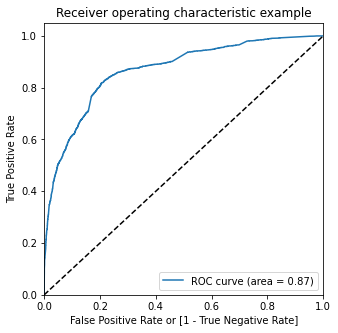

In [218]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [219]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.040501,0,1,0,0,0,0,0,0,0,0,0
1,0,0.306278,0,1,1,1,1,0,0,0,0,0,0
2,1,0.916820,1,1,1,1,1,1,1,1,1,1,1
3,0,0.181058,0,1,1,0,0,0,0,0,0,0,0
4,0,0.267763,0,1,1,1,0,0,0,0,0,0,0


In [220]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386334,1.000000,0.000000
0.1,0.1,0.533137,0.981742,0.250718
0.2,0.2,0.738281,0.882084,0.647749
0.3,0.3,0.794269,0.842526,0.763889
0.4,0.4,0.804262,0.783948,0.817050
0.5,0.5,0.792946,0.661849,0.875479
0.6,0.6,0.786481,0.572841,0.920977
0.7,0.7,0.774724,0.490300,0.953784
0.8,0.8,0.749302,0.393686,0.973180
0.9,0.9,0.704923,0.252187,0.989943


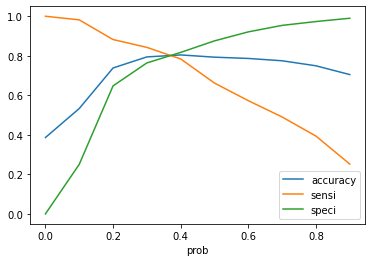

In [221]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.040501,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.306278,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.916820,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.181058,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.267763,0,1,1,1,0,0,0,0,0,0,0,0


In [223]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8035268185157972

In [224]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3317,  859],
       [ 478, 2151]], dtype=int64)

In [225]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [226]:
# Calculating the sensitivity
TP/(TP+FN)

0.8181818181818182

In [227]:
# Calculating the specificity
TN/(TN+FP)

0.7943007662835249

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 10. Prediction on Test set

In [228]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [229]:
# Substituting all the columns in the final train model
col = X_train.columns

In [230]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
8308,1.0,0.019920,0.416813,0,1,0,0,0,0,0,0,1,0,0
7212,1.0,0.015936,0.001320,0,0,0,0,0,1,0,0,0,0,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0,0
4048,1.0,0.015936,0.617077,0,1,0,0,0,0,0,0,0,0,0
4790,1.0,0.015936,0.005282,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,1.0,0.000000,0.000000,0,0,0,0,1,0,0,0,1,0,0
409,1.0,0.007968,0.110035,0,0,0,0,0,0,0,1,0,0,0
7372,1.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0
3790,1.0,0.039841,0.066461,0,1,0,0,0,0,0,0,1,0,0


In [231]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.270273
1,1,0.920002
2,1,0.989805
3,1,0.837700
4,0,0.106487


In [232]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.270273,0
1,1,0.920002,1
2,1,0.989805,1
3,1,0.837700,1
4,0,0.106487,0
...,...,...,...
2264,0,0.047210,0
2265,0,0.231284,0
2266,0,0.101690,0
2267,1,0.089837,0


In [233]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8056412516527105

In [234]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1156,  307],
       [ 134,  672]], dtype=int64)

In [235]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [236]:
# Calculating the sensitivity
TP/(TP+FN)

0.8337468982630273

In [237]:
# Calculating the specificity
TN/(TN+FP)

0.7901572112098428

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 11. Precision-Recall

In [238]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3656,  520],
       [ 889, 1740]], dtype=int64)

In [239]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7699115044247787

In [240]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6618486116394067

<font color= green>___With the current cut off as 0.35 we have Precision around 77% and Recall around 66%___</font>

### 11.1. Precision and recall tradeoff

In [241]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6800    0
 6801    0
 6802    0
 6803    0
 6804    1
 Name: Converted, Length: 6805, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6800    0
 6801    0
 6802    0
 6803    0
 6804    0
 Name: Predicted, Length: 6805, dtype: int64)

In [242]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

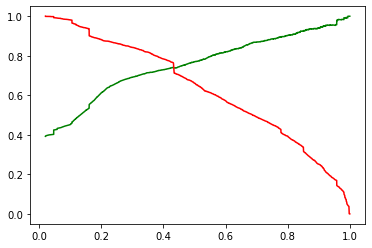

In [243]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [244]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.040501,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.306278,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.916820,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.181058,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.267763,0,1,1,1,0,0,0,0,0,0,0,0


In [245]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8051432770022042

In [246]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3431,  745],
       [ 581, 2048]], dtype=int64)

In [247]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [248]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7332617257429288

In [249]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7790034233548878

<font color= green>___With the current cut off as 0.41 we have Precision around 73% and Recall around 78%___</font>

## 12. Prediction on Test set

In [250]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.270273
1,1,0.920002
2,1,0.989805
3,1,0.837700
4,0,0.106487


In [251]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.270273,0
1,1,0.920002,1
2,1,0.989805,1
3,1,0.837700,1
4,0,0.106487,0
...,...,...,...
2264,0,0.047210,0
2265,0,0.231284,0
2266,0,0.101690,0
2267,1,0.089837,0


In [252]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8109299250771265

In [253]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1197,  266],
       [ 163,  643]], dtype=int64)

In [254]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [255]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7073707370737073

In [256]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7977667493796526

<font color= green>___With the current cut off as 0.41 we have Precision around 71% and Recall around 80%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	direct traffic<br>
b.	welingak website<br>
4.	When the last activity was Olark chat conversation. <br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.